#### Importing librarys and csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('911.csv')

In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### Top 5 township - Emergency call

In [22]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Check the unique records from 'titles' 

In [21]:
len(df['title'].unique()) #len() function returns the number of items of an object.

110

#### Create new column with  "Reason" to join the different incidents together

In [23]:
x = df['title'].iloc[0] #Python iloc() function enables to select a particular cell of a dataset

In [24]:
x.split(':')[0]

'EMS'

In [97]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

#### Most reason to call the emergency

In [99]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#### Using Seaborn to display a "countplot" to visualize the emergencies

<AxesSubplot:xlabel='Reason', ylabel='count'>

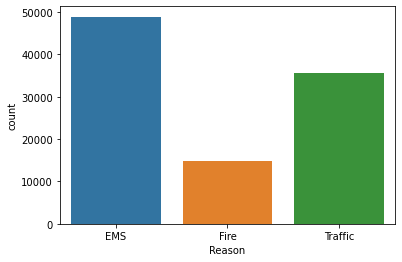

In [28]:
sns.countplot(x='Reason', data=df)

#### Check the timeStamps

In [29]:
type(df['timeStamp'].iloc[0])

str

#### Change the timestamp from a String to a date

In [31]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [96]:
time = df['timeStamp'].iloc[0]

In [33]:
time.hour

17

In [35]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [101]:
df['Day of Week'].iloc[0]

'Thu'

#### With a dictionary the numbers are changed to days of the week

In [37]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [38]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [103]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


#### Create a "Countplont" graphic with Seaborn, with which you can distinguish the days of the week and the reasons

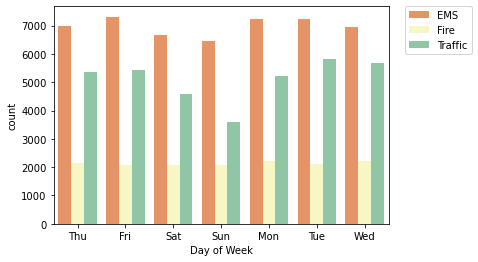

In [58]:
sns.countplot(x='Day of Week', data = df, hue='Reason', palette = 'Spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0)

#### Create same "Countplont" graphic for the Months

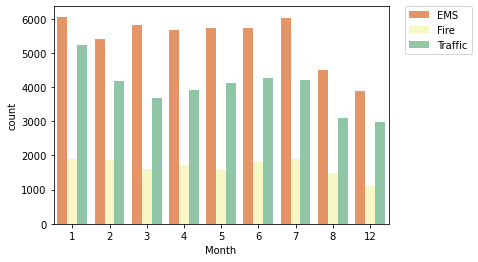

In [59]:
sns.countplot(x='Month', data = df, hue='Reason', palette = 'Spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0)

#### Look after the missing months 

In [60]:
byMonth = df.groupby('Month').count()

In [63]:
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


#### Linear graph of incoming calls

<AxesSubplot:xlabel='Month'>

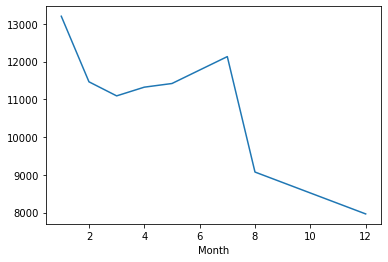

In [62]:
byMonth['twp'].plot()

#### Seaborns Implot()" tries to put a linear approximation on the calls per month.

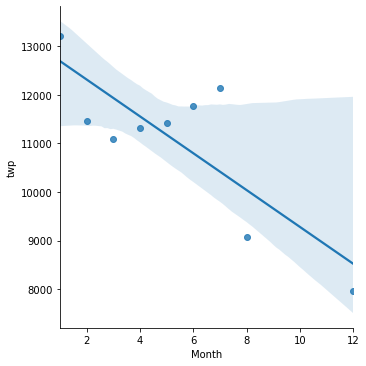

In [68]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

#### Creating new Column

In [69]:
df['Date'] = df['timeStamp'].apply(lambda t : t.date())

#### Create a new emergency diagram for the number of calls

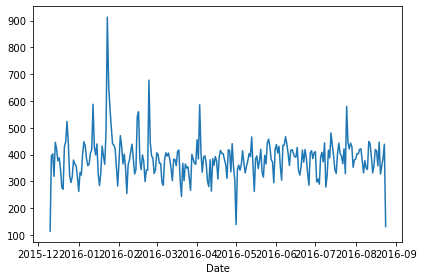

In [70]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

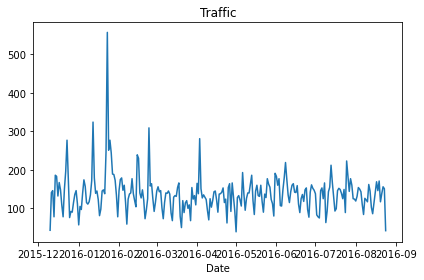

In [72]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

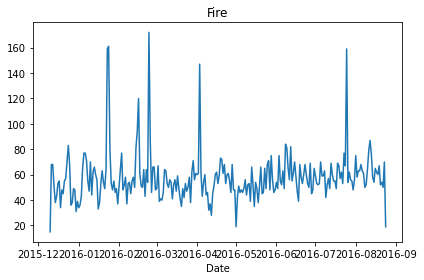

In [73]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

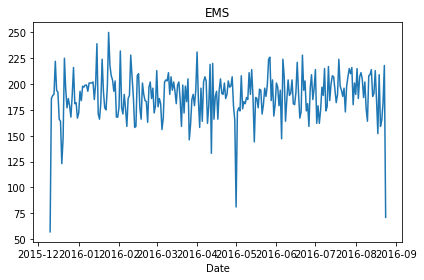

In [75]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

#### Reconstruct the DataFrame so that the hours become the columns and "Day of Week" becomes the index.

In [77]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


#### Create a HeatMap

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

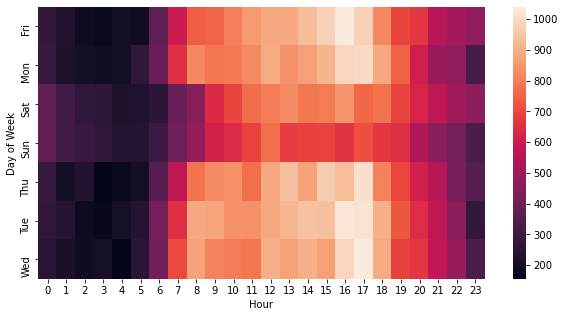

In [82]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour)

#### Creating a Clustermap with the DataFrames

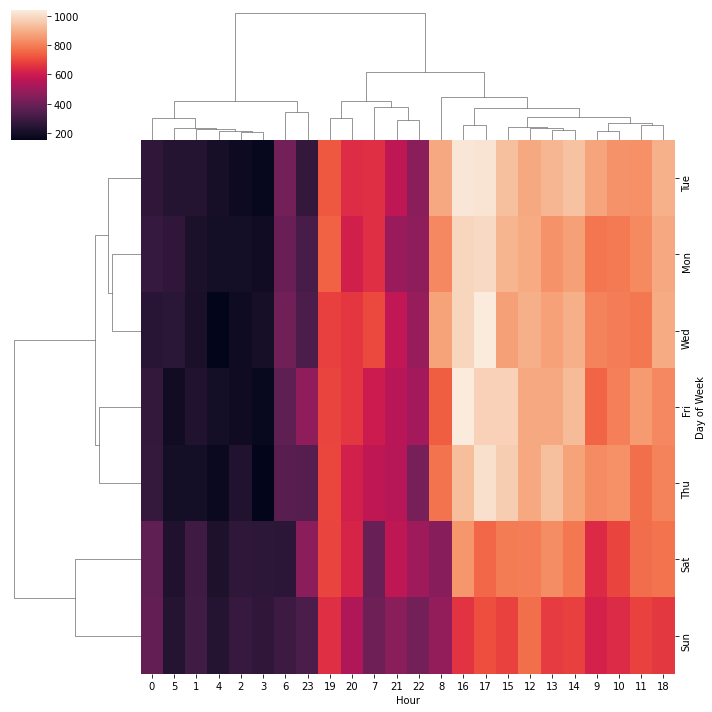

In [84]:
sns.clustermap(dayHour)

#### Restoring the operation under the condition that the month as Column subdivision

In [90]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

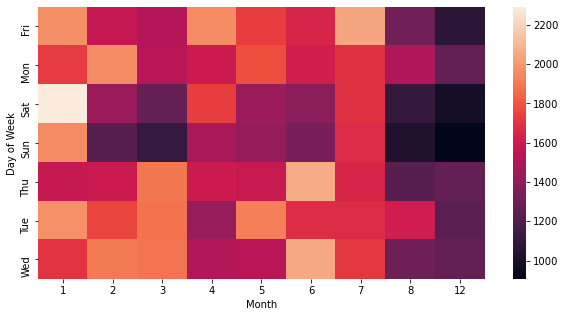

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(dayMonth)

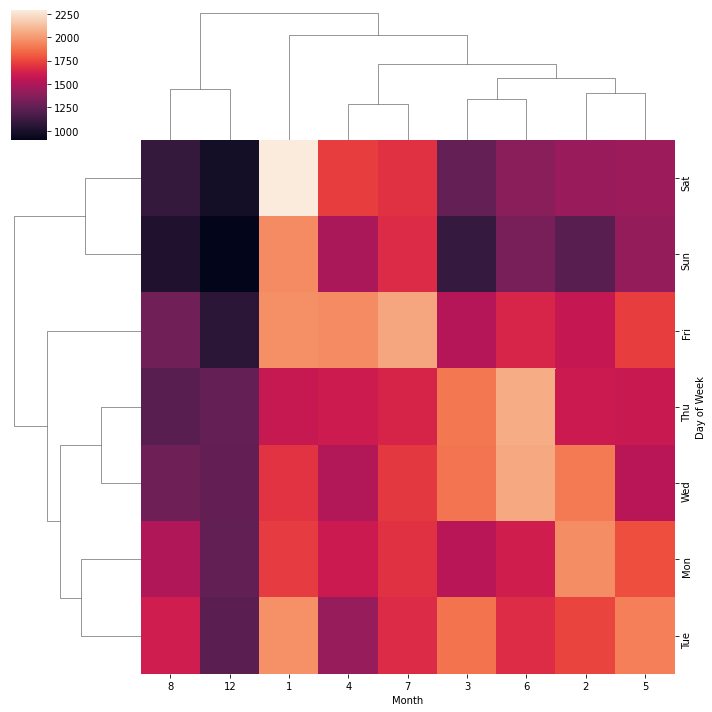

In [92]:
sns.clustermap(dayMonth)